### 1. Импорт библиотек и настройка

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

plt.style.use("seaborn")

### 2. Выполнение лабораторной работы №2. Часть 1

#### Задание 1.

In [5]:
df1 = pd.read_csv("orders.csv")
df2 = pd.read_csv("products.csv")

df1.head(), df2.head(), 

(   OrderID   OrderDate  ProductID  UnitPrice  Quantity  Discount
 0    10248  2007-01-30         11      28.62        12       0.0
 1    10248  2007-01-30         42      14.04        10       0.0
 2    10248  2007-01-30         72      12.71         5       0.0
 3    10249  2006-01-29         14      22.80         9       0.0
 4    10249  2006-01-29         51     101.20        40       0.0,
    ProductID ProductName  QuantityPerUnit  UnitCost  UnitPrice CategoryName
 0          1       Банан               10     15.37       20.0       Фрукты
 1          2    Апельсин               10     16.17       19.0       Фрукты
 2          5      Яблоко              100      4.72        6.0       Фрукты
 3         11        Киви               25     21.10       28.0       Фрукты
 4         24     Абрикос              100      3.90        4.5       Фрукты)

In [10]:
df1.info, df2.info

(<bound method DataFrame.info of       OrderID   OrderDate  ProductID  UnitPrice  Quantity  Discount
 0       10248  2007-01-30         11      28.62        12      0.00
 1       10248  2007-01-30         42      14.04        10      0.00
 2       10248  2007-01-30         72      12.71         5      0.00
 3       10249  2006-01-29         14      22.80         9      0.00
 4       10249  2006-01-29         51     101.20        40      0.00
 ...       ...         ...        ...        ...       ...       ...
 2167    11083  2006-06-16         37       4.50         7      0.00
 2168    11083  2006-06-16         42      15.65        10      0.00
 2169    11083  2006-06-16         47      25.50         5      0.00
 2170    11083  2006-06-16         51      99.90         3      0.03
 2171    11083  2006-06-16         62      24.00         5      0.04
 
 [2172 rows x 6 columns]>,
 <bound method DataFrame.info of     ProductID   ProductName  QuantityPerUnit  UnitCost  UnitPrice CategoryName

In [8]:
df_joined = pd.merge(df1, df2, how="inner", on="ProductID")
df_joined.head()

,OrderID,OrderDate,ProductID,UnitPrice_x,Quantity,Discount,ProductName,QuantityPerUnit,UnitCost,UnitPrice_y,CategoryName
0,10248,2007-01-30,11,28.62,12,0.0,Киви,25,21.1,28.0,Фрукты
1,10296,2004-02-02,11,26.62,12,0.0,Киви,25,21.1,28.0,Фрукты
2,10327,2004-07-08,11,29.10,50,0.2,Киви,25,21.1,28.0,Фрукты
3,10353,2007-06-11,11,29.75,12,0.2,Киви,25,21.1,28.0,Фрукты
4,10365,2004-06-24,11,29.48,24,0.0,Киви,25,21.1,28.0,Фрукты


##### 1) Определите число уникальных продуктов в каждой категории

In [35]:
df_joined.groupby(by="CategoryName")["ProductName"].count()

CategoryName
Кондитерские изделия    561
Крупы                    98
Молочные продукты       122
Морепродукты            157
Мясо/Птица              199
Овощи                   355
Приправы                318
Фрукты                  362
Name: ProductName, dtype: int64

##### 2) Выведите все продукты в категории "Морепродукты"

In [17]:
df_joined[df_joined["CategoryName"] == 'Морепродукты']

,OrderID,OrderDate,ProductID,UnitPrice_x,Quantity,Discount,ProductName,QuantityPerUnit,UnitCost,UnitPrice_y,CategoryName
130,10249,2006-01-29,51,101.20,40,0.00,Мидии,10,82.74,99.9,Морепродукты
131,10250,2007-02-03,51,97.67,35,0.15,Мидии,10,82.74,99.9,Морепродукты
132,10291,2004-03-24,51,106.56,2,0.10,Мидии,10,82.74,99.9,Морепродукты
133,10335,2005-11-16,51,104.29,48,0.20,Мидии,10,82.74,99.9,Морепродукты
134,10362,2004-06-22,51,109.79,20,0.00,Мидии,10,82.74,99.9,Морепродукты
...,...,...,...,...,...,...,...,...,...,...,...
2167,10515,2004-12-18,9,42.05,16,0.15,Омары,10,32.90,39.0,Морепродукты
2168,10687,2006-04-26,9,41.17,50,0.25,Омары,10,32.90,39.0,Морепродукты
2169,10693,2006-05-02,9,35.30,6,0.00,Омары,10,32.90,39.0,Морепродукты
2170,10848,2007-06-21,9,40.32,3,0.00,Омары,10,32.90,39.0,Морепродукты


In [26]:
df_joined

,OrderID,OrderDate,ProductID,UnitPrice_x,Quantity,Discount,ProductName,QuantityPerUnit,UnitCost,UnitPrice_y,CategoryName
0,10248,2007-01-30,11,28.62,12,0.00,Киви,25,21.1,28.0,Фрукты
1,10296,2004-02-02,11,26.62,12,0.00,Киви,25,21.1,28.0,Фрукты
2,10327,2004-07-08,11,29.10,50,0.20,Киви,25,21.1,28.0,Фрукты
3,10353,2007-06-11,11,29.75,12,0.20,Киви,25,21.1,28.0,Фрукты
4,10365,2004-06-24,11,29.48,24,0.00,Киви,25,21.1,28.0,Фрукты
...,...,...,...,...,...,...,...,...,...,...,...
2167,10515,2004-12-18,9,42.05,16,0.15,Омары,10,32.9,39.0,Морепродукты
2168,10687,2006-04-26,9,41.17,50,0.25,Омары,10,32.9,39.0,Морепродукты
2169,10693,2006-05-02,9,35.30,6,0.00,Омары,10,32.9,39.0,Морепродукты
2170,10848,2007-06-21,9,40.32,3,0.00,Омары,10,32.9,39.0,Морепродукты


##### 3) Выведите график числа заказов за каждый прошедший месяц.

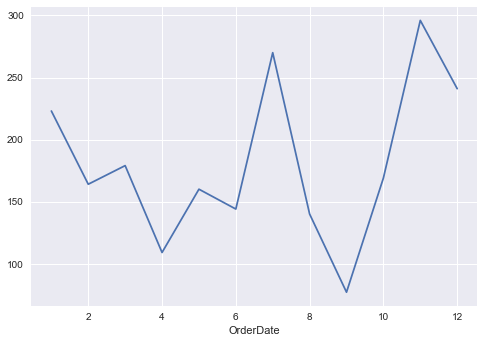

In [33]:
temp_df = df_joined.copy()
temp_df.index = date = pd.to_datetime(df_joined["OrderDate"])
temp_df.groupby(by=[temp_df.index.month])["Quantity"].count().plot();

In [36]:
df_joined.head()

,OrderID,OrderDate,ProductID,UnitPrice_x,Quantity,Discount,ProductName,QuantityPerUnit,UnitCost,UnitPrice_y,CategoryName
0,10248,2007-01-30,11,28.62,12,0.0,Киви,25,21.1,28.0,Фрукты
1,10296,2004-02-02,11,26.62,12,0.0,Киви,25,21.1,28.0,Фрукты
2,10327,2004-07-08,11,29.10,50,0.2,Киви,25,21.1,28.0,Фрукты
3,10353,2007-06-11,11,29.75,12,0.2,Киви,25,21.1,28.0,Фрукты
4,10365,2004-06-24,11,29.48,24,0.0,Киви,25,21.1,28.0,Фрукты


##### 4) Заведите столбец "OrderSum" (сколько было оплачено за продукт по заказу, с учётом его количества, стоимости единицы товара и скидки). Определите самые дорогие заказы (сгруппировав по OrderID)

In [46]:
# df_joined["OrderSum"] = df_joined["Quantity"] * df_joined["QuantityPerUnit"] * df_joined["UnitCost"]
df_joined["OrderSum"] = np.where(df_joined["Discount"] == 0.0, df_joined["Quantity"] * df_joined["QuantityPerUnit"] * df_joined["UnitPrice_x"],
                                df_joined["Quantity"] * df_joined["QuantityPerUnit"] * df_joined["UnitPrice_y"])
df_joined

,OrderID,OrderDate,ProductID,UnitPrice_x,Quantity,Discount,ProductName,QuantityPerUnit,UnitCost,UnitPrice_y,CategoryName,OrderSum
0,10248,2007-01-30,11,28.62,12,0.00,Киви,25,21.1,28.0,Фрукты,8586.0
1,10296,2004-02-02,11,26.62,12,0.00,Киви,25,21.1,28.0,Фрукты,7986.0
2,10327,2004-07-08,11,29.10,50,0.20,Киви,25,21.1,28.0,Фрукты,35000.0
3,10353,2007-06-11,11,29.75,12,0.20,Киви,25,21.1,28.0,Фрукты,8400.0
4,10365,2004-06-24,11,29.48,24,0.00,Киви,25,21.1,28.0,Фрукты,17688.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2167,10515,2004-12-18,9,42.05,16,0.15,Омары,10,32.9,39.0,Морепродукты,6240.0
2168,10687,2006-04-26,9,41.17,50,0.25,Омары,10,32.9,39.0,Морепродукты,19500.0
2169,10693,2006-05-02,9,35.30,6,0.00,Омары,10,32.9,39.0,Морепродукты,2118.0
2170,10848,2007-06-21,9,40.32,3,0.00,Омары,10,32.9,39.0,Морепродукты,1209.6


##### 5) Определите продукты с максимальной стоимостью за шт. (не за единицу товара)

In [34]:
df_joined.groupby(by="ProductName")["UnitCost"].max()

ProductName
Абрикос                   3.90
Ананас                   24.98
Апельсин                 16.17
Бадьян                   37.17
Баклажан                 62.38
                         ...  
Чеснок                    8.68
Чупа-Чупс                 6.69
Шоколад Молочное Чудо    25.39
Шоколад Снежинка         22.24
Яблоко                    4.72
Name: UnitCost, Length: 77, dtype: float64

#### Задание 2.

##### 1) Для каждой категории продуктов выведите средний доход от продаж. (OrderSum)

In [44]:
df_joined.groupby(by="CategoryName")["OrderSum"].mean()

CategoryName
Кондитерские изделия     7960.650463
Крупы                   15371.150816
Молочные продукты        2531.016475
Морепродукты            14033.045478
Мясо/Птица               9297.006482
Овощи                    8569.916817
Приправы                 4915.506321
Фрукты                   5735.712845
Name: OrderSum, dtype: float64

##### 2) Введите столбец "Profit" - разность между доходами и приблизительной закупочной стоимостью проданных товаров.

In [49]:
df_joined["Profit"] = df_joined["OrderSum"] - df_joined["Quantity"] * df_joined["QuantityPerUnit"] * df_joined["UnitCost"]
df_joined

,OrderID,OrderDate,ProductID,UnitPrice_x,Quantity,Discount,ProductName,QuantityPerUnit,UnitCost,UnitPrice_y,CategoryName,OrderSum,Profit
0,10248,2007-01-30,11,28.62,12,0.00,Киви,25,21.1,28.0,Фрукты,8586.0,2256.0
1,10296,2004-02-02,11,26.62,12,0.00,Киви,25,21.1,28.0,Фрукты,7986.0,1656.0
2,10327,2004-07-08,11,29.10,50,0.20,Киви,25,21.1,28.0,Фрукты,35000.0,8625.0
3,10353,2007-06-11,11,29.75,12,0.20,Киви,25,21.1,28.0,Фрукты,8400.0,2070.0
4,10365,2004-06-24,11,29.48,24,0.00,Киви,25,21.1,28.0,Фрукты,17688.0,5028.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2167,10515,2004-12-18,9,42.05,16,0.15,Омары,10,32.9,39.0,Морепродукты,6240.0,976.0
2168,10687,2006-04-26,9,41.17,50,0.25,Омары,10,32.9,39.0,Морепродукты,19500.0,3050.0
2169,10693,2006-05-02,9,35.30,6,0.00,Омары,10,32.9,39.0,Морепродукты,2118.0,144.0
2170,10848,2007-06-21,9,40.32,3,0.00,Омары,10,32.9,39.0,Морепродукты,1209.6,222.6


##### 3) Найдите по убыванию суммарной прибыли категории товаров, обеспечивающие  её 80 процентов. Выведите аналогичные данные только за 2005 и 2006 год.

In [53]:
df_joined["CategoryName"].unique()

array(['Фрукты', 'Мясо/Птица', 'Овощи', 'Крупы', 'Морепродукты',
       'Приправы', 'Кондитерские изделия', 'Молочные продукты'],
      dtype=object)

In [61]:
df_joined.groupby(by="CategoryName")["Profit"].sum() 

CategoryName
Кондитерские изделия    930348.57
Крупы                   294083.42
Молочные продукты        72855.99
Морепродукты            464952.45
Мясо/Птица              300192.76
Овощи                   729903.47
Приправы                360440.88
Фрукты                  415682.58
Name: Profit, dtype: float64

In [62]:
summed = df_joined["Profit"].sum()
summed

3568460.1199999996

In [64]:
new_df = df_joined.groupby(by="CategoryName")["Profit"].sum() / df_joined["Profit"].sum()
new_df

CategoryName
Кондитерские изделия    0.260714
Крупы                   0.082412
Молочные продукты       0.020417
Морепродукты            0.130295
Мясо/Птица              0.084124
Овощи                   0.204543
Приправы                0.101007
Фрукты                  0.116488
Name: Profit, dtype: float64

In [68]:
new_df.sort_values()

CategoryName
Молочные продукты       0.020417
Крупы                   0.082412
Мясо/Птица              0.084124
Приправы                0.101007
Фрукты                  0.116488
Морепродукты            0.130295
Овощи                   0.204543
Кондитерские изделия    0.260714
Name: Profit, dtype: float64

#### Задание 3.

##### 1) Разбейте датасет на тренировочную, валидационную и тестовую выборку

In [71]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [75]:
train_validation, test = train_test_split(df, test_size = 0.2)
train_validation.shape, test.shape

((16512, 10), (4128, 10))

In [76]:
train, validation = train_test_split(train_validation, test_size = 0.2)
train.shape, validation.shape

((13209, 10), (3303, 10))

##### 2) Проведите преобразование категориального признака ocean_proximity через OneHot или Dummy-кодировку


In [86]:
df_dummy = pd.get_dummies(train, columns=["ocean_proximity"])
df_dummy

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
4305,-118.30,34.09,32.0,2202.0,674.0,2178.0,635.0,2.0307,226700.0,1,0,0,0,0
9246,-120.06,36.97,38.0,1542.0,364.0,1220.0,334.0,1.6250,52800.0,0,1,0,0,0
7069,-118.02,33.95,36.0,1632.0,295.0,797.0,283.0,4.2292,179500.0,1,0,0,0,0
16355,-121.32,38.03,25.0,2474.0,513.0,1947.0,524.0,2.5742,98400.0,0,1,0,0,0
2351,-119.68,36.79,16.0,1551.0,NaN,1010.0,292.0,3.5417,71300.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7833,-118.16,33.91,28.0,2922.0,739.0,3013.0,673.0,2.9531,127100.0,1,0,0,0,0
5614,-118.25,33.79,38.0,1730.0,460.0,1724.0,424.0,2.7308,150400.0,0,0,0,0,1
8044,-118.16,33.84,36.0,2220.0,367.0,1002.0,351.0,5.0719,219500.0,1,0,0,0,0
13291,-117.66,34.07,33.0,2081.0,409.0,1008.0,375.0,2.5870,138100.0,0,1,0,0,0


##### 3) Замените признаки total_rooms и total_bedrooms на average_rooms и average_bedrooms (поделив на households).

In [87]:
df["total_rooms"] /= df["households"]
df["total_bedrooms"] /= df["households"]

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,6.984127,1.023810,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,6.238137,0.971880,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,8.288136,1.073446,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,5.817352,1.073059,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,6.281853,1.081081,565.0,259.0,3.8462,342200.0,NEAR BAY


##### 4) В признаке average_bedrooms (total_bedrooms) есть отсутствующие значения. Определите число экземпляров данных, для которых этот признак отсутствует. Придумайте и обоснуйте стратегию заполнения пропусков в этой задаче. Заполните пропуски.

In [88]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [89]:
df["total_bedrooms"].fillna(value=df["total_bedrooms"].mean, inplace=True)
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

##### 5) Нормализуйте признаки longitude и latitude (сделайте так, чтобы каждый признак имел среднее значение 0 и дисперсию 1 внутри обучающей выборки)

In [90]:
from sklearn.preprocessing import StandardScaler

In [104]:
scaller = StandardScaler()

longitude_data = df["longitude"].to_numpy().reshape(-1, 1)
latitude_data = df["latitude"].to_numpy().reshape(-1, 1)

longitude_data, latitude_data

(array([[-122.23],
        [-122.22],
        [-122.24],
        ...,
        [-121.22],
        [-121.32],
        [-121.24]]),
 array([[37.88],
        [37.86],
        [37.85],
        ...,
        [39.43],
        [39.43],
        [39.37]]))

In [105]:
df["longitude"] = pd.Series(scaller.fit_transform(longitude_data))
df["latitude"] = pd.Series(scaller.fit_transform(latitude_data))

ValueError: Data must be 1-dimensional

### 3. Выполнение лабораторной работы №2. Часть 2

#### Задание 1.

In [25]:
df = pd.read_csv("Davis.csv")
df.head()

,Unnamed: 0,sex,weight,height,repwt,repht
0,1,M,77,182,77.0,180.0
1,2,F,58,161,51.0,159.0
2,3,F,53,161,54.0,158.0
3,4,M,68,177,70.0,175.0
4,5,F,59,157,59.0,155.0


In [26]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,sex,weight,height,repwt,repht
0,M,77,182,77.0,180.0
1,F,58,161,51.0,159.0
2,F,53,161,54.0,158.0
3,M,68,177,70.0,175.0
4,F,59,157,59.0,155.0


##### 1) Удалите некорректные данные

In [27]:
df.isna().sum() / len(df) * 100

sex       0.0
weight    0.0
height    0.0
repwt     8.5
repht     8.5
dtype: float64

In [28]:
df.dropna(inplace=True)
df.isna().sum() / len(df) * 100

sex       0.0
weight    0.0
height    0.0
repwt     0.0
repht     0.0
dtype: float64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     181 non-null    object 
 1   weight  181 non-null    int64  
 2   height  181 non-null    int64  
 3   repwt   181 non-null    float64
 4   repht   181 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 8.5+ KB


##### 2) Выделите тестовую выборку из 50 экземпляров

In [12]:
from sklearn.model_selection import train_test_split

In [29]:
train, test = train_test_split(df, test_size=50)
train.shape, test.shape

((131, 5), (50, 5))

##### 3) На тренировочных данных постройте: Гистограмму height, Гистограмму weight, Эти же гистограммы для разных полов

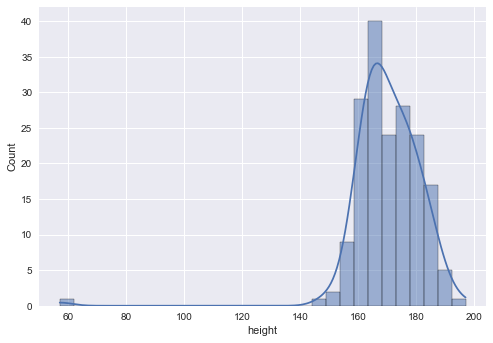

In [16]:
sns.histplot(df["height"], kde = True);

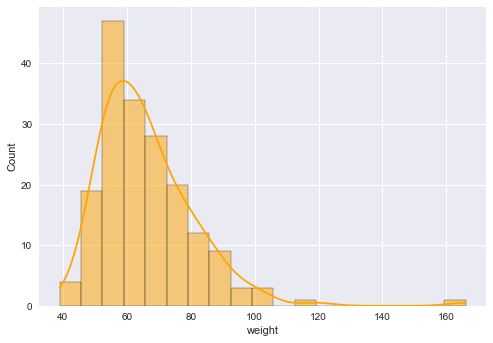

In [18]:
sns.histplot(df["weight"], kde = True, color = "orange");

In [6]:
df_men = df[df["sex"] == 'M']
df_women = df[df["sex"] == 'F']

df_men.head(), df_women.head()

(  sex  weight  height  repwt  repht
 0   M      77     182   77.0  180.0
 3   M      68     177   70.0  175.0
 5   M      76     170   76.0  165.0
 6   M      76     167   77.0  165.0
 7   M      69     186   73.0  180.0,
    sex  weight  height  repwt  repht
 1    F      58     161   51.0  159.0
 2    F      53     161   54.0  158.0
 4    F      59     157   59.0  155.0
 11   F     166      57   56.0  163.0
 12   F      51     161   52.0  158.0)

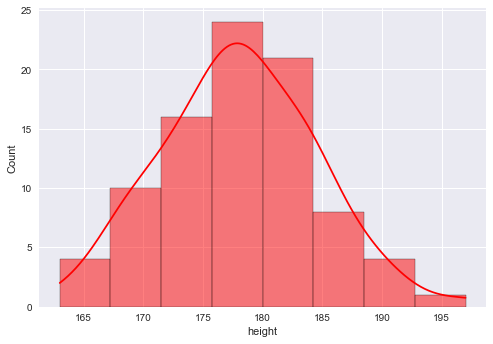

In [9]:
sns.histplot(df_men['height'], kde = True, color = "red");

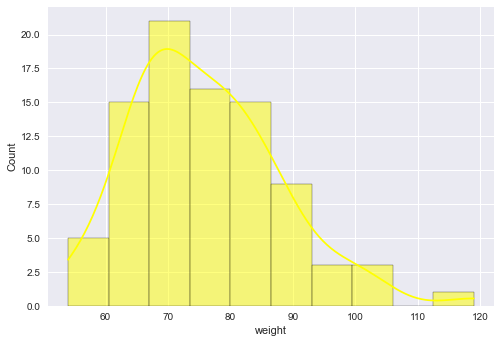

In [11]:
sns.histplot(df_men["weight"], kde = True, color = "yellow");

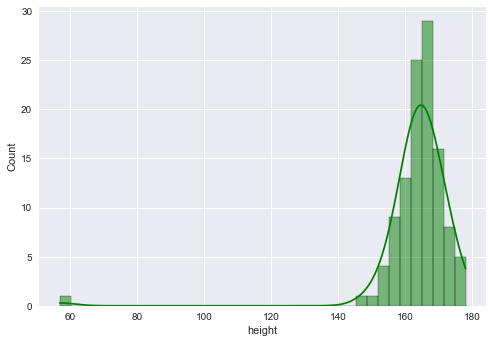

In [13]:
sns.histplot(df_women["height"], kde = True, color = "green");

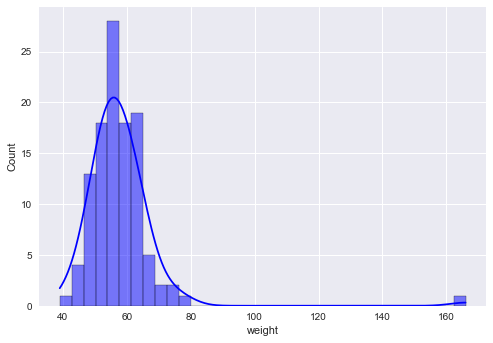

In [14]:
sns.histplot(df_women["weight"], kde = True, color = "blue");

##### 4) На тренировочных данных обучите классификатор пола (sex), используя только признаки height и weight. Замерьте производительность на тренировочной и тестовой выборке (через Accuracy). Рекомендуемые модели:  логистическая регрессия, quadratic discriminant analysis.

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [37]:
train.replace({'M': 0, 'F': 1}, inplace=True)
test.replace({'M': 0, 'F': 1}, inplace=True)

train.head(), test.head()

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


(     sex  weight  height  repwt  repht
 5      0      76     170   76.0  165.0
 94     0      88     189   87.0  185.0
 199    0      79     177   81.0  178.0
 52     0      74     169   73.0  170.0
 85     0      59     182   61.0  183.0,
      sex  weight  height  repwt  repht
 139    0      85     191   83.0  188.0
 10     0      70     175   75.0  174.0
 102    1      47     163   47.0  160.0
 90     0      70     173   68.0  170.0
 23     0      66     173   70.0  170.0)

In [42]:
y_train = train["sex"].to_numpy()
X_train = train.loc[:, "sex":"repht"].to_numpy()

In [43]:
clf = LogisticRegression().fit(X_train, y_train)
clf.score(X, y) # Обучающая выборка

1.0

In [44]:
y_test = test["sex"].to_numpy()
X_test = test.loc[:, "sex":"repht"].to_numpy()
predictions = clf.predict(X_test) # Тестовая выборка

In [46]:
accuracy_score(predictions, y_test)

0.98

#### Задание 2.

##### 1) Возьмите данные с листа 1 и выделите валидационную и тестовую выборку.

In [47]:
df = pd.read_excel("Folds5x2_pp.xlsx", sheet_name = "Sheet1")

df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [48]:
train_validation, test = train_test_split(df, test_size = 0.2)
train, validation = train_test_split(train_validation, test_size = 0.2)

train.shape, validation.shape, test.shape

((6123, 5), (1531, 5), (1914, 5))

##### 2) Постройте регрессионную модель.  Замерьте коэффициент R^2 и среднюю ошибку предсказания на валидационной выборке.

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [53]:
y_train = train["PE"].to_numpy()
X_train = train.loc[:, "AT":"RH"].to_numpy()

y_val = validation["PE"].to_numpy()
X_val = validation.loc[:, "AT":"RH"].to_numpy()

y_test = test["PE"].to_numpy()
X_test = test.loc[:, "AT":"RH"].to_numpy()

In [57]:
linear = LinearRegression().fit(X_train, y_train)
print(linear.score(X_train, y_train)) # R^2

predictions_val = linear.predict(X_val)
mean_squared_error(predictions_val, y_val) # MSE

0.9277073144902548


20.286853570623713

##### 3) Постройте точки из валидационной выборки на плоскости (t=истинное значение, y=предсказание модели). Отобразите вместе с ними прямую y=t. 

In [66]:
k, b = np.polyfit(y_val, predictions_val, 1)

Text(0, 0.5, 'Оценка')

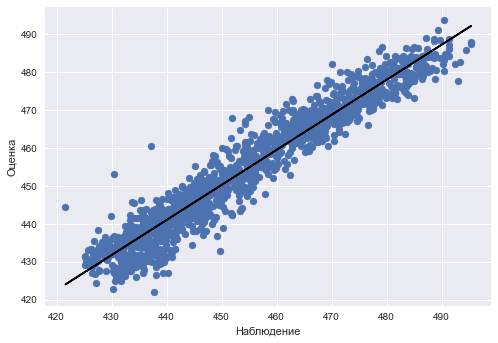

In [68]:
plt.scatter(y_val, predictions_val)
plt.plot(y_val, k * y_val + b, color = 'k')
plt.xlabel("Наблюдение")
plt.ylabel("Оценка")